<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge
by Tan Jun Pin

# Overview

With the ever-rising cost of living, essential needs are getting more expensive. Food, clothes, and shelter are unavoidable for everyone. Out of these, shelter or house always contributed to the biggest part of spending. It could easily be one of the largest purchases for some. Money should be spent carefully especially on purchase of this scale. Good thing about houses is the future selling price could be way lower than the current purchase price. If selection of house is made carefully, the house price could appreciate in the future as well. This project is to identify how one could select the house with potential in price appreciation. 

Targeting Ames, Iowa, the sold price for transaction done between the year 2006 to 2010 were recorded. We would be utilizing this dataset to do the modelling and prediction.

<img src='./image/ames_iowa.png' style="float: left; margin: 10px; height: 500px">

# Contents:
 - [Datasets Sources](#Datasets-Sources)
 - [Problem Statement](#Problem-Statement)
 - [Code](#Code)
 - [Conclusions & Recommendations](#Conclusions-&-Recommendations)

# Datasets Sources

This dataset was obtained from Kaggle. The dataset consists of 81 columns and 2051 rows with 78 unique features pertaining to the house condition. The set of data was generated based on the house features and price sold between the year 2006-2010 at Ames, Iowa. 
The features in this dataset are assumed to be not related to one another in this project

 * [`train.csv`](./data/train.csv): Train Ames Housing Dataset ([source](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/code))
  * [`test.csv`](./data/test.csv): Test Ames Housing Dataset ([source](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/code))
  
The differences between the 2 datasets are the 'SalePrice' columns. The first dataset, Train Ames Housing Dataset contains the transaction price of the ouse while the later dataset does not contain transaction price. Test Ames Housing Dataset is only used to predict the transaction price for submission to Kaggle Challenge.
  

# Problem Statement
  
  For the new home owner, ensuring the house they purchase could yield the highest return in the future, modelling and predictions were made. Hence, the objectives for this project are as follows:
- To identify the top and bottom features that affect the Sale Price of the house
- To identify the non-permanent feature of house that could lead to high Sale Price after renovation.


# Code

---
## Importing Library & Datasets
---

In [1]:
# imports library and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LogisticRegression, Lasso, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.dummy import DummyRegressor # For baseline Model
import scipy.stats as ss
import itertools

In [2]:
# To display all columns in datasets
pd.set_option('display.max_columns', None)

In [3]:
np.set_printoptions(threshold=np.inf)

In [4]:
# Import train dataset
house = pd.read_csv('./datasets/train.csv')
print(house.shape)
house.head(5)

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# To check on percentage of null values in each features
empty_percent = {}
for col in house:
    nans = round(house[col].isna().sum()/house.shape[0]*100, 1)
    empty_percent[col] = nans 
    
# Show the value in descending order where highest % of null value feature will be shown first
for trait in sorted(empty_percent.items(),reverse = True,key=lambda x: x[1]):
    print(trait)

('Pool QC', 99.6)
('Misc Feature', 96.8)
('Alley', 93.2)
('Fence', 80.5)
('Fireplace Qu', 48.8)
('Lot Frontage', 16.1)
('Garage Yr Blt', 5.6)
('Garage Finish', 5.6)
('Garage Qual', 5.6)
('Garage Cond', 5.6)
('Garage Type', 5.5)
('Bsmt Exposure', 2.8)
('Bsmt Qual', 2.7)
('Bsmt Cond', 2.7)
('BsmtFin Type 1', 2.7)
('BsmtFin Type 2', 2.7)
('Mas Vnr Type', 1.1)
('Mas Vnr Area', 1.1)
('Bsmt Full Bath', 0.1)
('Bsmt Half Bath', 0.1)
('Id', 0.0)
('PID', 0.0)
('MS SubClass', 0.0)
('MS Zoning', 0.0)
('Lot Area', 0.0)
('Street', 0.0)
('Lot Shape', 0.0)
('Land Contour', 0.0)
('Utilities', 0.0)
('Lot Config', 0.0)
('Land Slope', 0.0)
('Neighborhood', 0.0)
('Condition 1', 0.0)
('Condition 2', 0.0)
('Bldg Type', 0.0)
('House Style', 0.0)
('Overall Qual', 0.0)
('Overall Cond', 0.0)
('Year Built', 0.0)
('Year Remod/Add', 0.0)
('Roof Style', 0.0)
('Roof Matl', 0.0)
('Exterior 1st', 0.0)
('Exterior 2nd', 0.0)
('Exter Qual', 0.0)
('Exter Cond', 0.0)
('Foundation', 0.0)
('BsmtFin SF 1', 0.0)
('BsmtFin SF 2'

---
## Data Cleaning 
---

General cleaning on the dataset is done for easier data usage

### Renaming the column

Spaces between works are replaced with underscore 

In [7]:
house.columns = house.columns.str.replace(' ','_')

### Changing Column Datatype

Changing the columns with float type of 1 decimal places '0' to integers

In [8]:
def cont(feature):
    house[feature] = house[feature].fillna(0)
    house[feature] = house[feature].astype(int)

In [9]:
cont('Garage_Cars')

In [10]:
cont('Bsmt_Full_Bath')

In [11]:
cont('Bsmt_Half_Bath')

### Initial Check

Going through the important features that may potentially affect the housing price

#### the tables above showing the basic statiscal values of the datasets, we could visually identify the outlier / incorrect datasets.
'Garage_Yr_Blt' has the maximum value of 2207 which is incorrect as the dataset was meant for properties sold between 2006 to 2010.


### Null Values Identification / Imputation

Out of the 80 features, there are both categorical and continuous variables. To ensure the 'NA' acronym in some categorical features do not return to np.nan, all the 'NA' will be replaced with '0'.
'0' could be both numerical and categorical which is more ideal in this situation.

In [12]:
# To check on percentage of null values in each features
empty_percent = {}
for col in house:
    nans = round(house[col].isna().sum()/house.shape[0]*100, 2)
    empty_percent[col] = nans 

# Show the value in descending order where highest % of null value feature will be shown first
for trait in sorted(empty_percent.items(),reverse = True,key=lambda x: x[1]):
    print(trait)    

('Pool_QC', 99.56)
('Misc_Feature', 96.83)
('Alley', 93.17)
('Fence', 80.5)
('Fireplace_Qu', 48.76)
('Lot_Frontage', 16.09)
('Garage_Yr_Blt', 5.56)
('Garage_Finish', 5.56)
('Garage_Qual', 5.56)
('Garage_Cond', 5.56)
('Garage_Type', 5.51)
('Bsmt_Exposure', 2.83)
('BsmtFin_Type_2', 2.73)
('Bsmt_Qual', 2.68)
('Bsmt_Cond', 2.68)
('BsmtFin_Type_1', 2.68)
('Mas_Vnr_Type', 1.07)
('Mas_Vnr_Area', 1.07)
('BsmtFin_SF_1', 0.05)
('BsmtFin_SF_2', 0.05)
('Bsmt_Unf_SF', 0.05)
('Total_Bsmt_SF', 0.05)
('Garage_Area', 0.05)
('Id', 0.0)
('PID', 0.0)
('MS_SubClass', 0.0)
('MS_Zoning', 0.0)
('Lot_Area', 0.0)
('Street', 0.0)
('Lot_Shape', 0.0)
('Land_Contour', 0.0)
('Utilities', 0.0)
('Lot_Config', 0.0)
('Land_Slope', 0.0)
('Neighborhood', 0.0)
('Condition_1', 0.0)
('Condition_2', 0.0)
('Bldg_Type', 0.0)
('House_Style', 0.0)
('Overall_Qual', 0.0)
('Overall_Cond', 0.0)
('Year_Built', 0.0)
('Year_Remod/Add', 0.0)
('Roof_Style', 0.0)
('Roof_Matl', 0.0)
('Exterior_1st', 0.0)
('Exterior_2nd', 0.0)
('Exter_Qual',

In [13]:
house.replace(np.nan, 0, inplace = True)

### Initial Check: Year Built, Year Remodel, Year Garrage Built & Year Sold
This part is meant to check on any incorrect year based on the 4 features. The criterias of check are as follows:
- Year Remodel shall be after Year Built
- Year Garrage Built shall be same or later than Year Built
- Year Sold shall be same after all other features.

#### Data Cleaning: Year Remodel shall be after Year Built

In [14]:
house_year = house[['Id', 'Year_Built', 'Year_Remod/Add', 'Garage_Yr_Blt', 'Yr_Sold']]

In [15]:
house_year = house_year.assign(Remodel_aft_Built = house['Year_Remod/Add'] - house['Year_Built'])

In [16]:
house_year.sort_values('Remodel_aft_Built').head()

,Id,Year_Built,Year_Remod/Add,Garage_Yr_Blt,Yr_Sold,Remodel_aft_Built
1003,851,2002,2001,2002.0,2009,-1
1025,1784,2007,2007,2007.0,2007,0
1171,1233,1962,1962,1962.0,2008,0
1170,2337,2006,2006,2006.0,2006,0
1168,2436,2003,2003,2003.0,2006,0


##### Analysis
Property with index 1003 has incorrect Year Remodel as the year stated in dataset is 1 year earlier than the property was built. 
Hence, the Year Remodel will be amended to same year with Year Built instead.

In [17]:
# To obtain the column index for colum 'Year_Remod/Add'
col_ind = house.columns.get_loc('Year_Remod/Add')

# To call for the 'Year_Remod/Add' for property at index 1003
house.iat[1003,col_ind]

2001

In [18]:
# Replace the value to 2002 instead of 2001
house.iat[1003,col_ind] = 2002

In [19]:
# Cross Check on the edited 'Year_Remod/Add'
house[house['Id'] == 851]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
1003,851,907194160,20,RL,65.0,10739,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444,0,0,1444,1,0,2,0,3,1,Gd,6,Typ,0,0,Attchd,2002.0,RFn,2,577.0,TA,TA,Y,144,40,0,0,0,0,0,0,0,0,4,2009,WD,203000


#### Data Cleaning: Year Garrage Built shall be same or later than Year Built

In [20]:
house_year.replace(0,np.nan,inplace = True)

In [21]:
house_year = house_year[house_year['Garage_Yr_Blt'].notna()]

In [22]:
house_year = house_year.assign(Gar_aft_Built = house['Garage_Yr_Blt'] - house['Year_Built'])

In [23]:
print(len(house_year[house_year['Gar_aft_Built'] < 0]))

house_year = house_year.sort_values('Gar_aft_Built').head(15)
house_year

11


,Id,Year_Built,Year_Remod/Add,Garage_Yr_Blt,Yr_Sold,Remodel_aft_Built,Gar_aft_Built
336,694,1935,1998,1920.0,2009,63.0,-15.0
493,911,1935,1950,1926.0,2009,15.0,-9.0
77,1350,1927,1950,1920.0,2008,23.0,-7.0
1716,1528,1930,1950,1925.0,2008,20.0,-5.0
72,2613,1959,1959,1954.0,2006,NaN,-5.0
902,2110,2006,2006,2005.0,2007,NaN,-1.0
533,904,1941,1950,1940.0,2009,9.0,-1.0
1686,2627,1950,1950,1949.0,2006,NaN,-1.0
1907,1236,1963,1963,1962.0,2008,NaN,-1.0
1076,1352,1923,2000,1922.0,2008,77.0,-1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


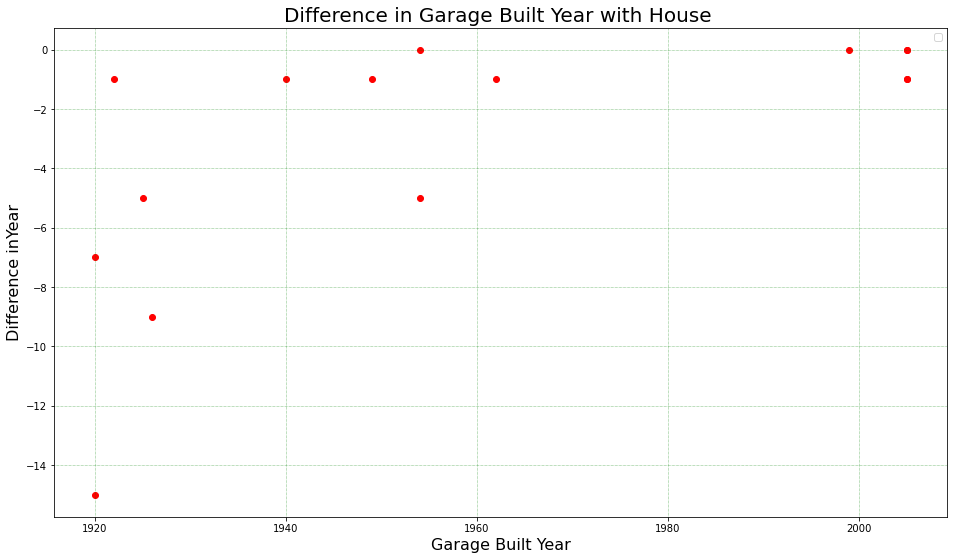

In [24]:
plt.figure(figsize = (16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(house_year['Garage_Yr_Blt'], house_year['Gar_aft_Built'], color = 'r')
plt.title("Difference in Garage Built Year with House ", fontsize = 20)
plt.ylabel("Difference inYear", fontsize = 16)
plt.xlabel("Garage Built Year", fontsize = 16);
plt.grid(color='g', linestyle=':', linewidth=0.5, visible = bool )
plt.legend()
plt.savefig('./image/garage_house_built.jpg')

##### Analysis
It seems like there are 11 propeties had its garage built before the house. This is generally more common in the 1920s and 1930s. Homebuilders had their garage built first so that they could live in it while their house was constructed ([*source*](https://getd.libs.uga.edu/pdfs/sager_jonathan_e_200205_mhp.pdf)). 
Hence, the data for 'Garage_Yr_Blt' remains.

#### Data Cleaning: Year Sold shall be same after all other features.

In [25]:
house_year['Latest_Year'] = house_year[['Year_Built', 'Year_Remod/Add', 'Garage_Yr_Blt']].max(axis = 1)

In [26]:
house_year['Sold_aft_Latest'] = house_year['Yr_Sold'] - house_year['Latest_Year']

In [27]:
print(len(house_year[house_year['Sold_aft_Latest'] < 0]))

house_year.sort_values('Sold_aft_Latest').head(5)

0


,Id,Year_Built,Year_Remod/Add,Garage_Yr_Blt,Yr_Sold,Remodel_aft_Built,Gar_aft_Built,Latest_Year,Sold_aft_Latest
1964,1638,2006,2007,2005.0,2007,1.0,-1.0,2007.0,0.0
902,2110,2006,2006,2005.0,2007,NaN,-1.0,2006.0,1.0
1281,472,2005,2006,2005.0,2009,1.0,0.0,2006.0,3.0
1284,526,2005,2006,2005.0,2009,1.0,0.0,2006.0,3.0
1283,2778,1999,2000,1999.0,2006,1.0,0.0,2000.0,6.0


##### Analysis
The property with index 1699, 1885 & 1719 had the sold year to be earlier than the built and remodeled year. The sold year for the property will be changed to match with the latest year from the 3 features. 

In [28]:
# To obtain the column index for colum 'Yr_Sold'
col_ind = house.columns.get_loc('Yr_Sold')

# To call for the 'Yr_Sold' for property at index 1003
house.iat[1885,col_ind]

2007

In [29]:
# Replace the value to 2002 instead of 2001
house.iat[1699,col_ind] = 2007
house.iat[1885,col_ind] = 2009
house.iat[1719,col_ind] = 2008

In [30]:
# Cross Check on the edited 'Yr_Sold'
house[house['Id'] == (2181)]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
1885,2181,908154195,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1,1,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3,1154.0,TA,TA,Y,546,484,0,0,0,0,0,0,Elev,17000,10,2009,New,183850


In [31]:
# Cross Check on the edited 'Yr_Sold'
house[house['Id'] == (1703)]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
1719,1703,528120010,60,RL,134.0,16659,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,2007.0,Unf,2,728.0,TA,TA,Y,0,368,0,0,0,0,0,0,0,0,6,2008,New,260116


Year related features are sanitized and cleaned

### Initial Check: Neighborhood feature

In [32]:
print(house['Neighborhood'].nunique())
house['Neighborhood'].value_counts()

28


NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

There are 28 unique values for neighborhood but only 25 neighborhoods being specified in this datasets. 
The 3 non-specified neigborhood which are 'Greens' , 'GrnHill' & 'Landmrk'. 


In [33]:
house[house['Lot_Area'] == house['Lot_Area'].max()]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
471,2116,906426060,50,RL,0.0,159000,Pave,0,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389.0,TA,TA,Y,0,98,0,0,0,0,0,0,Shed,500,6,2007,WD,277000


----
## Exploratory Data Aalysis (EDA) & External Research
----

Property price are affected by many variables. There are 80 features in this datasets but not all features are impacting the price heavily. Hence, we are going handpicked some features that will affet the price based on researches. 

### Sale Prices Histogram

/Users/yijunang/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


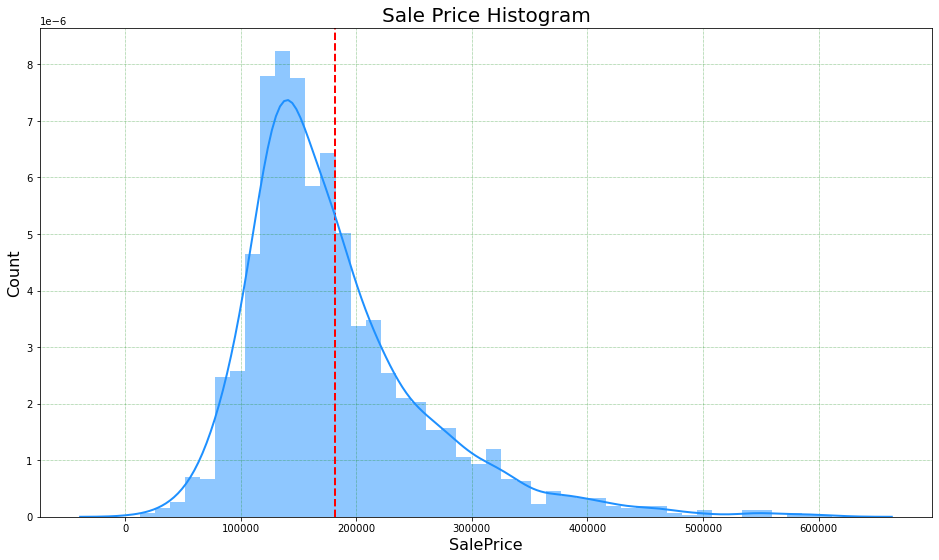

In [34]:
plt.figure(figsize = (16, 9))

plt.title('Sale Price Histogram', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 16)
plt.axvline(house['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.grid(color='g', linestyle=':', linewidth=0.5, visible = bool )

kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})
sns.distplot(house['SalePrice'], color="dodgerblue", label="Compact", **kwargs)
plt.savefig('./image/salepri.jpg')

#### Analysis 
Based on the histrogram, with the mean price line, it is obvious that the charts are positively skewed. There are more houses sell below the mean price which could be due to some high sale price sale price 

### Lot Area and Sale Prices

Lot area is often seek as a very crucial factors in affecting the property price ([*source*](https://www.orlandosentinel.com/news/os-xpm-1999-02-07-9902040827-story.html)). Let's see on the scatter plot below for verification.

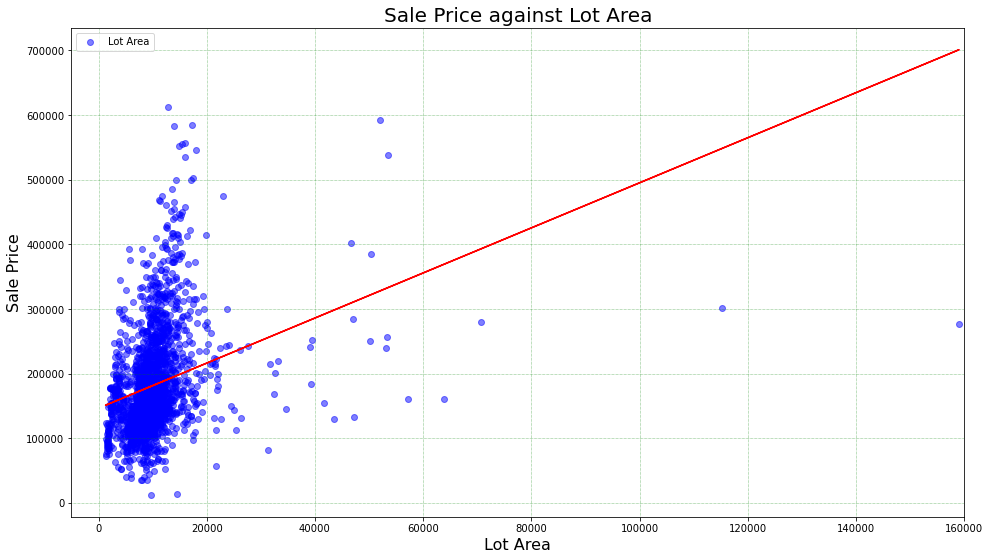

In [35]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create scatterplot of total score against participation rate for year 2017
plt.scatter(house['Lot_Area'],house['SalePrice'], label = "Lot Area", alpha = 0.5, color = 'b');
# Create the trend line for the dataset
z1 = np.polyfit(house['Lot_Area'], house['SalePrice'], 1)
p1 = np.poly1d(z1)
plt.plot(house['Lot_Area'],p1(house['Lot_Area']), color = 'r')


plt.title("Sale Price against Lot Area", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 16)
plt.xlabel("Lot Area", fontsize = 16);
plt.grid(color='g', linestyle=':', linewidth=0.5, visible = bool )
plt.xlim(-5000,160000)
plt.legend()
plt.savefig('./image/lotarea_salepri.jpg')


#### Analysis
The plot captures very obvious outliers in the datasets. There are 2 data where the lot areas are higher than the rest which could be skewing the the data distribution. Hence, the 2 data will be removed from the datasets for further analysis.

### Cleaned Lot Area and Sale Price

In [36]:
# To return highest Lot Area 
house.sort_values("Lot_Area", ascending = False).head(3)

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
471,2116,906426060,50,RL,0.0,159000,Pave,0,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389.0,TA,TA,Y,0,98,0,0,0,0,0,0,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,0.0,115149,Pave,0,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739.0,TA,TA,Y,380,48,0,0,0,0,0,0,0,0,6,2007,WD,302000
1854,2767,906475200,20,RL,62.0,70761,Pave,0,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2,576.0,TA,TA,Y,200,54,0,0,0,0,0,0,0,0,12,2006,WD,280000


In [37]:
house_ori = house

In [38]:
# To drop the 2 outliers with index 471 and 694
house = house.drop(labels=[471,694], axis=0)

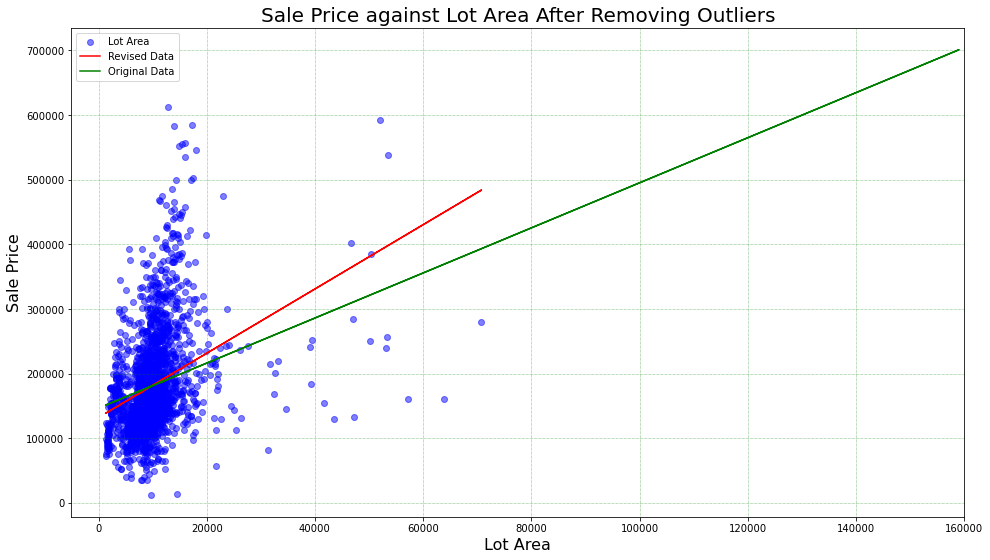

In [39]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create scatterplot of total score against participation rate for year 2017
plt.scatter(house['Lot_Area'],house['SalePrice'], label = "Lot Area", alpha = 0.5, color = 'b');
# Create the trend line for the dataset
z1 = np.polyfit(house['Lot_Area'], house['SalePrice'], 1)
p1 = np.poly1d(z1)
plt.plot(house['Lot_Area'],p1(house['Lot_Area']), color = 'r', label = 'Revised Data')

z = np.polyfit(house_ori['Lot_Area'], house_ori['SalePrice'], 1)
p = np.poly1d(z)
plt.plot(house_ori['Lot_Area'],p(house_ori['Lot_Area']), color = 'g', label = 'Original Data')


plt.title("Sale Price against Lot Area After Removing Outliers", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 16)
plt.xlabel("Lot Area", fontsize = 16);
plt.grid(color='g', linestyle=':', linewidth=0.5, visible = bool )
plt.xlim(-5000,160000)
plt.legend()
plt.savefig('./image/lotarea_salepri_rev.jpg')

#### Analysis
Generally it is an uptrend to have higher Sale Price when the Lot Area increases. However, majority of the higher Sale Price are spotted for those Lot Area lower than 200,000 sqft. This could be due to majority of the residential Lot Area does not exceed 200,000 sqft.

### House Area Features
Apart from the Lot Area, the house areas are also important features affecting the SalePrice. There are 3 living areas that could potential affect the SalePrice which are 'Total_Bsmt_SF', 'Gr_Liv_Area', '1st_Flr_SF'and '2nd_Flr_SF'. 

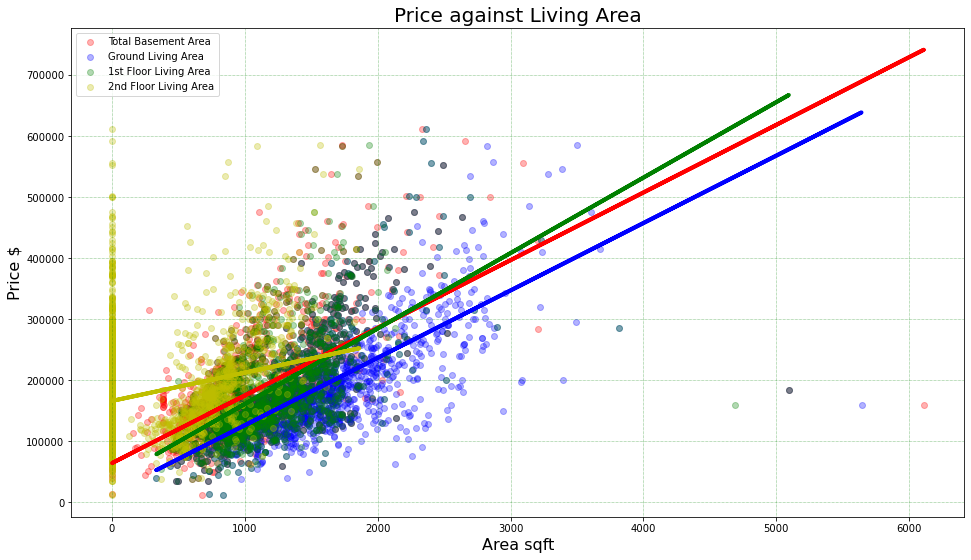

In [40]:
plt.figure(figsize = (16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(house['Total_Bsmt_SF'], house['SalePrice'], label = 'Total Basement Area', alpha = 0.3, color = 'r')
z1 = np.polyfit(house['Total_Bsmt_SF'], house['SalePrice'], 1)
p1 = np.poly1d(z1)
plt.plot(house['Total_Bsmt_SF'],p1(house['Total_Bsmt_SF']), color = 'r', linewidth = 4)

plt.scatter(house['Gr_Liv_Area'], house['SalePrice'], label = 'Ground Living Area', alpha = 0.3, color = 'b')
z1 = np.polyfit(house['Gr_Liv_Area'], house['SalePrice'], 1)
p1 = np.poly1d(z1)
plt.plot(house['Gr_Liv_Area'],p1(house['Gr_Liv_Area']), color = 'b', linewidth = 4)

plt.scatter(house['1st_Flr_SF'], house['SalePrice'], label = '1st Floor Living Area', alpha = 0.3, color = 'g')
z1 = np.polyfit(house['1st_Flr_SF'], house['SalePrice'], 1)
p1 = np.poly1d(z1)
plt.plot(house['1st_Flr_SF'],p1(house['1st_Flr_SF']), color = 'g', linewidth = 4)

plt.scatter(house['2nd_Flr_SF'], house['SalePrice'], label = '2nd Floor Living Area', alpha = 0.3, color = 'y')
z1 = np.polyfit(house['2nd_Flr_SF'], house['SalePrice'], 1)
p1 = np.poly1d(z1)
plt.plot(house['2nd_Flr_SF'],p1(house['2nd_Flr_SF']), color = 'y', linewidth = 4)


plt.legend();
plt.title('Price against Living Area', fontsize = 20)
plt.xlabel('Area sqft', fontsize = 16)
plt.ylabel('Price $', fontsize = 16)
plt.grid(color='g', linestyle=':', linewidth=0.5, visible = bool )
plt.savefig('./image/livigarea_salepri.jpg')

#### Analysis
In general, areas are directly proportional to the Sale Price. We could see this from the 4 linear lines derived in the graphs. The effective basement area and ground living area have the steepest curve. This represents the sale price increases more when the area of these 2 features increases comparing to the 1st floor living area and 2nd floor living area. 2nd Floor Living Area has the weakest coefficient among these areas.

### Neighborhood and Sale Price

Location is always very important feature to be considered when acquiring a property. Hence, we will check on the best neighborhood for house in Ames Iowa.

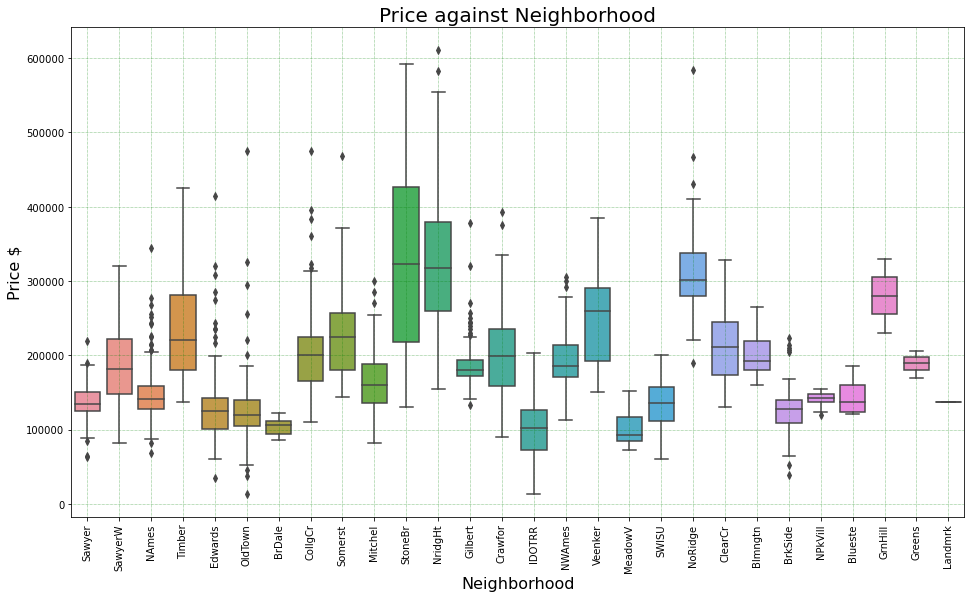

In [41]:
plt.figure(figsize = (16, 9))
sns.boxplot(data = house, x = 'Neighborhood', y = 'SalePrice')

plt.title('Price against Neighborhood', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 16)
plt.ylabel('Price $', fontsize = 16)
plt.xticks(rotation = 90)
plt.grid(color='g', linestyle=':', linewidth=0.5, visible = bool )
plt.savefig('./image/neigh_salepr.jpg')

StoneBR and NridgHt seems to have highest mean Sale Price. These 2 regions are the region with most expensive property in Ames Iowa. Conversely, BrDale, IDOTRR and MeadowV are areas with lower Sale Price Mean values. 

### Identify Correlation between Variables

The dataset has bot continuous and discrete variables. The correlations between 2 different types of variables are done separetely. This is done with the assumptions that the features have no relationship with one another.

Prior to correlating the features, something needs to be done for null values.

#### Determine the Continuous and Discrete Features

We shall start with listing down the variables that are categorical. Categorical features are identified based on the unique values of each features. Discrete variable typically has lesser unique values compared to Continuous Variable. Hence, to identify the discrete feature, the list of columns are indentified.

In [42]:
# Columns with nunique values smaller than 17 will be classify as Discrete Variable. 
# Define an empty list to store the name of discrete features
cat_column = []
for j in house.columns:
        if house[j].nunique()<= 17 :
            cat_column.append(j)

# Check on the number of features that falls under discrete variable
print(len(cat_column))
cat_column

56


['MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_2',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Kitchen_Qual',
 'TotRms_AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Pool_Area',
 'Pool_QC',
 'Fence',
 'Misc_Feature',
 'Mo_Sold',
 'Yr_Sold',
 'Sale_Type']

In [43]:
# To ensure the categorical datas are removed, list of remainder columns are called.
# To create a copy of the dataset
house_temp = house.copy

# Returning the columns remained in the datasets after dropping all categorical dataset
# The list of index is the numerical variables
num_column = house_temp().drop(cat_column, axis = 1).columns.tolist()

print(len(num_column))
num_column

25


['Id',
 'PID',
 'Lot_Frontage',
 'Lot_Area',
 'Neighborhood',
 'Year_Built',
 'Year_Remod/Add',
 'Mas_Vnr_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 '1st_Flr_SF',
 '2nd_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Garage_Yr_Blt',
 'Garage_Area',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 '3Ssn_Porch',
 'Screen_Porch',
 'Misc_Val',
 'SalePrice']

'Neighborhood', 'Year_Built'. 'Year_Remod/Add' and 'Garage_Yr_Blt' are considered as categorical datas as the values cannot be continuous. 

Hence, the 4 additional features are added into the categorical list.

In [44]:
# Pool Area is not a categorical feature and will be removed from the list as area is a continuous variable
cat_column.remove('Pool_Area')

# As Neighborhood has nunique over 17, it is manually append into the list defined earlier.
cat_column.append('Neighborhood')
print(f'cat_column has {len(cat_column)} items')

# Pool Area will be added into cat_column
num_column.append('Pool_Area')

# 'ID' and 'PID' are removed from the numberical columns as the two features does not have any relationship with sales price
not_in_num_col = ['Id', 'PID', 'Neighborhood']
for _ in not_in_num_col:
    num_column.remove(_)
print(f'num_column has {len(num_column)} items')

cat_column has 56 items
num_column has 23 items


At now, we have successfully split the data features into 2 based on the variable types. 

#### Correlating the Continuous Features

Correlation between the continuous variables are done by using the heatmap below.

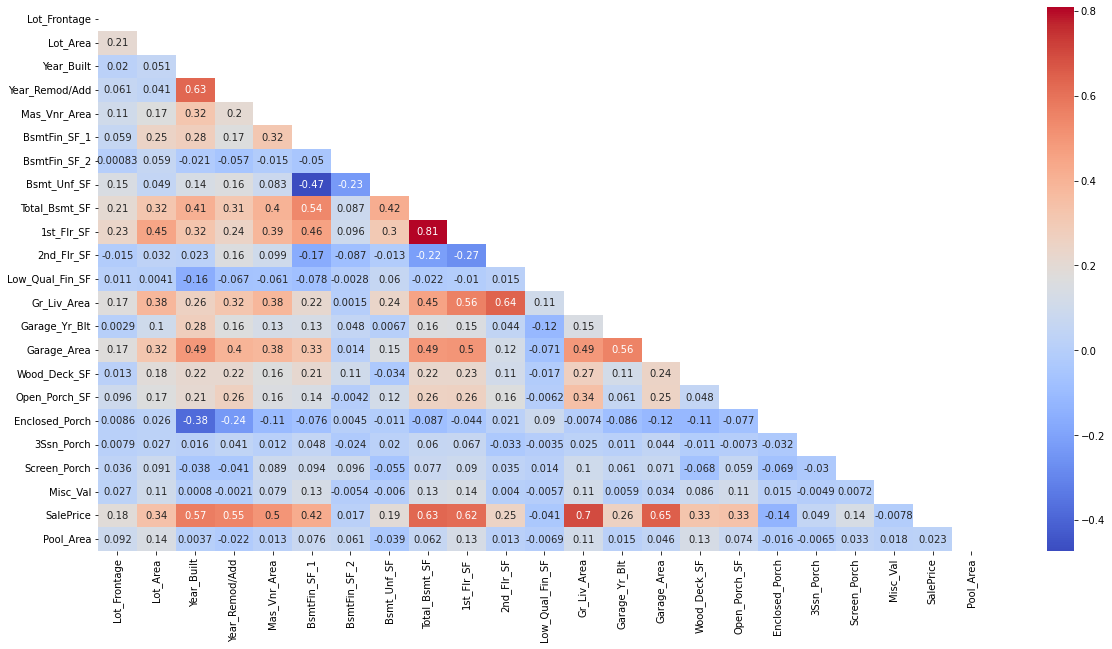

In [45]:
# Plotting heatmap to find the correlation between each feature with SalePrice
mask = np.zeros_like(house[num_column].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
sns.heatmap(
    house[num_column].corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);
plt.savefig('./image/num_corr_heatmap.jpg')

Looking at the pairplot above, in correlating with SalePrice, we can identify features that have above 0.5 coefficient. This indicates that the features are highly correlated to the SalePrice feature.

In [46]:
# Returning the features that have above 0.5 coeffiecient from the pairplot above.
high_corr_num = house[num_column].corr()['SalePrice']
high_corr_num = high_corr_num[high_corr_num.values > 0.50]

# Store the high correlation column as list
high_corr_num_col = high_corr_num.index.tolist()

print(len(high_corr_num_col))
high_corr_num_col

8


['Year_Built',
 'Year_Remod/Add',
 'Mas_Vnr_Area',
 'Total_Bsmt_SF',
 '1st_Flr_SF',
 'Gr_Liv_Area',
 'Garage_Area',
 'SalePrice']

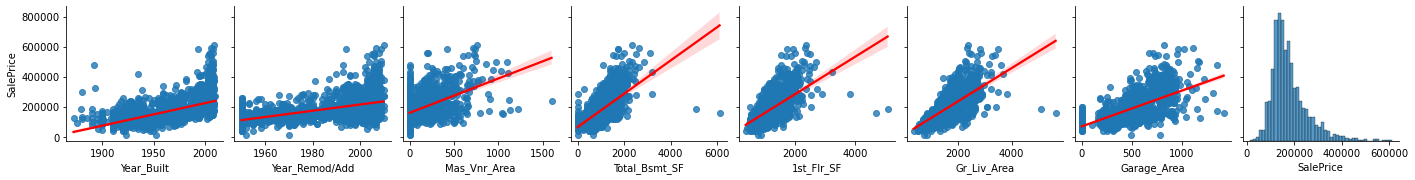

In [47]:
# Plot pairplot to check on the distribution against SalePrice
sns.pairplot(house, y_vars = ['SalePrice'] , x_vars = high_corr_num_col,  kind="reg", plot_kws={'line_kws':{'color':'red'}})

From the plots above, Strong linear correlation can be seen in the graphs above. The higher the selected features, the higher the SalePrice.

Also, based on the histogram, we could see the prices are positively skewed. Majority of the SalePrice are below the range of $200,000.

#### Correlating the Discrete Features

Correlation between the discrete variables cannot be done with simple heatmap. Instead, Cramer's V function is introduced to identify the correlation between the categorical features for identification of the important features.

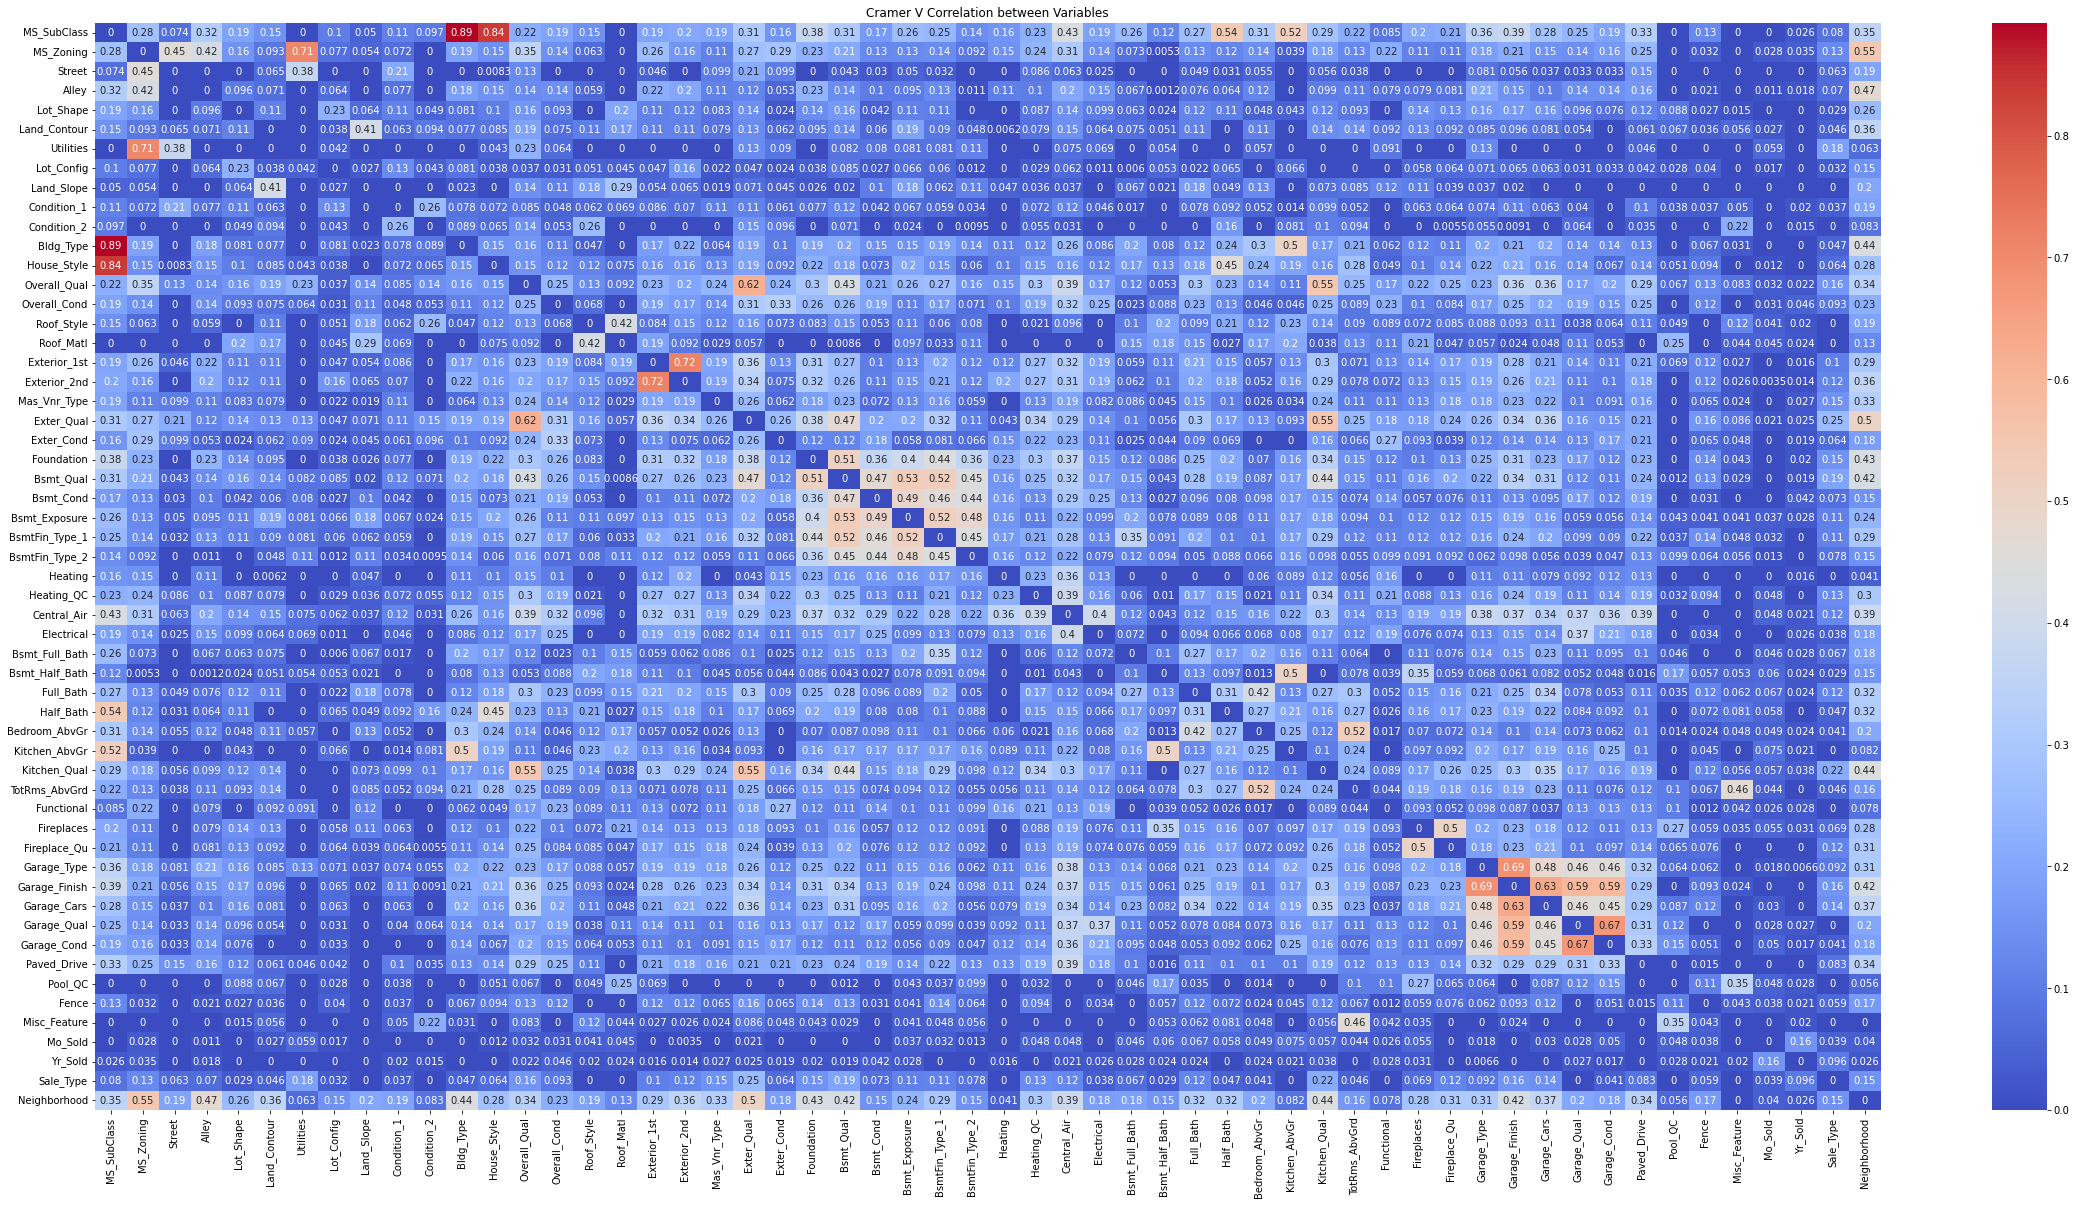

In [48]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


corrM = np.zeros((len(cat_column),len(cat_column)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cat_column, 2):
    idx1, idx2 = cat_column.index(col1), cat_column.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(house[col1], house[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cat_column, columns=cat_column)
fig, ax = plt.subplots(figsize=(40, 20))
ax = sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm'); ax.set_title("Cramer V Correlation between Variables");
plt.savefig('./image/cat_corr_heatmap.jpg')

In [49]:
# To store the new list of categorical features with high correlation as a separate list
# Due to overwhelming features, features that are over 0.7 are considered highly correlated
# define empty list for storing
high_corr_cat_col = []

# Assuming only taking one of the highly related features.
# taking both features that are highly related may resulting in noises as regression model may not be able to perform 
# Hence, only 1 of the highly related features are selected.
for n in range(len(corr.columns)): # To go through the loop in number of columns involved in correlation
    for m in range(0,n,1): 
        if n == m: # To avoid getting the other highly related features, the loop will break if the index is same
            break            
        else:
            coeff = corr.loc[corr.columns[n],corr.columns[m]] 
            if coeff > 0.5: # Store only coefficient that is higher than 0.7
                high_corr_cat_col.append(corr.columns[n])

#Removing repeated features        
high_corr_cat_col

['Utilities',
 'Bldg_Type',
 'House_Style',
 'Exterior_2nd',
 'Exter_Qual',
 'Bsmt_Qual',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_1',
 'Half_Bath',
 'Kitchen_AbvGr',
 'Kitchen_AbvGr',
 'Kitchen_Qual',
 'Kitchen_Qual',
 'TotRms_AbvGrd',
 'Fireplace_Qu',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_Qual',
 'Garage_Cond',
 'Garage_Cond',
 'Neighborhood',
 'Neighborhood']

#### Obtaining datasets with combined highly correlated features

In [50]:
house_mod = pd.concat([house[high_corr_num_col],house[high_corr_cat_col]], axis = 1)

In [51]:
print(house_mod.shape)
house_mod

(2049, 31)


,Year_Built,Year_Remod/Add,Mas_Vnr_Area,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Garage_Area,SalePrice,Utilities,Bldg_Type,House_Style,Exterior_2nd,Exter_Qual,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_Type_1,Half_Bath,Kitchen_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Kitchen_Qual,TotRms_AbvGrd,Fireplace_Qu,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Garage_Cond,Neighborhood,Neighborhood
0,1976,2005,289.0,725.0,725,1479,475.0,130500,AllPub,1Fam,2Story,Plywood,Gd,TA,No,GLQ,GLQ,1,1,1,Gd,Gd,6,0,RFn,2,TA,TA,TA,Sawyer,Sawyer
1,1996,1997,132.0,913.0,913,2122,559.0,220000,AllPub,1Fam,2Story,VinylSd,Gd,Gd,No,GLQ,GLQ,1,1,1,Gd,Gd,8,TA,RFn,2,TA,TA,TA,SawyerW,SawyerW
2,1953,2007,0.0,1057.0,1057,1057,246.0,109000,AllPub,1Fam,1Story,VinylSd,TA,TA,No,GLQ,GLQ,0,1,1,Gd,Gd,5,0,Unf,1,TA,TA,TA,NAmes,NAmes
3,2006,2007,0.0,384.0,744,1444,400.0,174000,AllPub,1Fam,2Story,VinylSd,TA,Gd,No,Unf,Unf,1,1,1,TA,TA,7,0,Fin,2,TA,TA,TA,Timber,Timber
4,1900,1993,0.0,676.0,831,1445,484.0,138500,AllPub,1Fam,1.5Fin,Plywood,TA,Fa,No,Unf,Unf,0,1,1,TA,TA,6,0,Unf,2,TA,TA,TA,SawyerW,SawyerW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2007,2007,0.0,1884.0,1728,1728,520.0,298751,AllPub,1Fam,1Story,VinylSd,Gd,Gd,Av,GLQ,GLQ,0,1,1,Gd,Gd,7,Gd,Fin,2,TA,TA,TA,Timber,Timber
2047,1940,1950,0.0,861.0,861,861,539.0,82500,AllPub,1Fam,1Story,VinylSd,TA,TA,No,BLQ,BLQ,0,1,1,TA,TA,4,0,Unf,2,TA,TA,TA,Edwards,Edwards
2048,1928,1950,0.0,896.0,1172,1913,342.0,177000,AllPub,1Fam,1.5Fin,Stone,TA,TA,No,Unf,Unf,1,1,1,TA,TA,9,TA,Unf,2,Fa,Fa,Fa,Crawfor,Crawfor
2049,1956,1956,0.0,1200.0,1200,1200,294.0,144000,AllPub,1Fam,1Story,Plywood,TA,TA,No,Rec,Rec,0,1,1,TA,TA,6,Gd,Unf,1,TA,TA,TA,NAmes,NAmes


---
## New Model Training and Comparison
---

As the model has both categorical and numerical data, the model needs to be one-hot encoded. 

In [52]:
house_mod_dumm = pd.get_dummies(house_mod, columns=high_corr_cat_col, drop_first = True)

In [53]:
print(house_mod_dumm.shape)
house_mod_dumm.head()

(2049, 256)


,Year_Built,Year_Remod/Add,Mas_Vnr_Area,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Garage_Area,SalePrice,Utilities_NoSeWa,Utilities_NoSewr,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Exter_Qual_Fa,Exter_Qual_Gd,Exter_Qual_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_Po,Bsmt_Qual_TA,Bsmt_Exposure_Av,Bsmt_Exposure_Gd,Bsmt_Exposure_Mn,Bsmt_Exposure_No,BsmtFin_Type_1_ALQ,BsmtFin_Type_1_BLQ,BsmtFin_Type_1_GLQ,BsmtFin_Type_1_LwQ,BsmtFin_Type_1_Rec,BsmtFin_Type_1_Unf,BsmtFin_Type_1_ALQ,BsmtFin_Type_1_BLQ,BsmtFin_Type_1_GLQ,BsmtFin_Type_1_LwQ,BsmtFin_Type_1_Rec,BsmtFin_Type_1_Unf,BsmtFin_Type_1_ALQ,BsmtFin_Type_1_BLQ,BsmtFin_Type_1_GLQ,BsmtFin_Type_1_LwQ,BsmtFin_Type_1_Rec,BsmtFin_Type_1_Unf,BsmtFin_Type_1_ALQ,BsmtFin_Type_1_BLQ,BsmtFin_Type_1_GLQ,BsmtFin_Type_1_LwQ,BsmtFin_Type_1_Rec,BsmtFin_Type_1_Unf,Half_Bath_1,Half_Bath_2,Kitchen_AbvGr_1,Kitchen_AbvGr_2,Kitchen_AbvGr_3,Kitchen_AbvGr_1,Kitchen_AbvGr_2,Kitchen_AbvGr_3,Kitchen_AbvGr_1,Kitchen_AbvGr_2,Kitchen_AbvGr_3,Kitchen_AbvGr_1,Kitchen_AbvGr_2,Kitchen_AbvGr_3,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_TA,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_TA,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_TA,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_TA,TotRms_AbvGrd_3,TotRms_AbvGrd_4,TotRms_AbvGrd_5,TotRms_AbvGrd_6,TotRms_AbvGrd_7,TotRms_AbvGrd_8,TotRms_AbvGrd_9,TotRms_AbvGrd_10,TotRms_AbvGrd_11,TotRms_AbvGrd_12,TotRms_AbvGrd_13,TotRms_AbvGrd_14,TotRms_AbvGrd_15,Fireplace_Qu_Ex,Fireplace_Qu_Fa,Fireplace_Qu_Gd,Fireplace_Qu_Po,Fireplace_Qu_TA,Garage_Finish_Fin,Garage_Finish_RFn,Garage_Finish_Unf,Garage_Cars_1,Garage_Cars_2,Garage_Cars_3,Garage_Cars_4,Garage_Cars_5,Garage_Qual_Ex,Garage_Qual_Fa,Garage_Qual_Gd,Garage_Qual_Po,Garage_Qual_TA,Garage_Cond_Ex,Garage_Cond_Fa,Garage_Cond_Gd,Garage_Cond_Po,Garage_Cond_TA,Garage_Cond_Ex,Garage_Cond_Fa,Garage_Cond_Gd,Garage_Cond_Po,Garage_Cond_TA,Garage_Cond_Ex,Garage_Cond_Fa,Garage_Cond_Gd,Garage_Cond_Po,Garage_Cond_TA,Garage_Cond_Ex,Garage_Cond_Fa,Garage_Cond_Gd,Garage_Cond_Po,Garage_Cond_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,

### New Model: Define Train and Test Dataframe

'SalePrice' will be dropped from the X dataframe and selected for the y.

In [54]:
house_mod_X = house_mod_dumm.drop('SalePrice', axis = 1)
house_mod_y = house_mod_dumm['SalePrice']
print(house_mod_X.shape) 
print(house_mod_y.shape)

(2049, 255)
(2049,)


In [55]:
# Spliting the datasets into train and test
mod_X_train, mod_X_test, mod_y_train, mod_y_test = train_test_split(house_mod_X, house_mod_y, test_size=0.7, random_state=123)

### New Model: Applying Linear Regression Model

In [56]:
# Initializing
lr_mod = LinearRegression()

In [57]:
# Fitting the model
lr_mod.fit(mod_X_train, mod_y_train)

LinearRegression()

In [58]:
print(lr_mod.score(mod_X_train, mod_y_train))
print(lr_mod.score(mod_X_test, mod_y_test))

0.9208005709563751
0.8054883432528782


#### Analysis
The $R^2$ values of the train are good while the test model has relatively lower value with around 0.25 in difference. 
This signifies that the model is overfilt. It does not generalize the data well and not able to predict when a new dataset is introduced.

### New Model: Standardize the Predictors / Feature Engineering

Due to large differences between the numerical values for in the datasets, standardizing different feature magnitudes.

In [59]:
# Initializing
sc_mod = StandardScaler()

# Fit & transform on train dataset and fit on test dataset
mod_Z_train = sc_mod.fit_transform(mod_X_train) 
mod_Z_test = sc_mod.transform(mod_X_test) 

### New Model: Applying RidgeCV Regression Model

Allowing RidgeCV to identify the best alphas through logarithmic space

In [60]:
r_mod_alphas = np.logspace(0, 5, 100)

In [61]:
# Initializing
ridgecv_mod = RidgeCV(alphas=r_mod_alphas, scoring='r2', cv=5)

In [62]:
# Fitting the model
ridgecv_mod.fit(mod_Z_train, mod_y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [63]:
print(ridgecv_mod.score(mod_Z_train, mod_y_train))
print(ridgecv_mod.score(mod_Z_test, mod_y_test))

0.9088857380141335
0.8363795710633278


#### Analysis
The $R^2$ values of the train and test are better comparing with Linear Regression model. However, with approximate 0.1 difference in the value, it signifies that the model is overfilt. It still does not perform as good as the train model when new data is introduced.

### New Model: Applying LassoCV Regression Model

Allowing LassoCV to identify the best alpha through n_alphas

In [64]:
# Initializing
lassocv_mod = LassoCV(n_alphas=1000, cv=5, max_iter=50000)

In [65]:
# Fitting the model
lassocv_mod.fit(mod_Z_train, mod_y_train)

LassoCV(cv=5, max_iter=50000, n_alphas=1000)

In [66]:
lassocv_mod.alpha_

2348.846551607464

In [67]:
print(lassocv_mod.score(mod_Z_train, mod_y_train))
print(lassocv_mod.score(mod_Z_test, mod_y_test))

0.87996393905783
0.8081561873925474


#### Analysis
The $R^2$ values of the train and test are better comparing with Linear Regression model but performance is very similar to RidgeCV Regression. However, with approximate 0.1 difference in the value, it signifies that the model is overfilt. It still does not perform as good as the train model when new data is introduced.

### New Model: Applying ElasticNet Regression Model

Allowing Elastic to identify the best alpha through linear space

In [68]:
enet_mod_alphas = np.linspace(0.5, 1.0, 100)

In [69]:
# Instantiate model.
enet_mod = ElasticNetCV(alphas=enet_mod_alphas, cv=5)

In [70]:
# Fitting the model
enet_mod.fit(mod_Z_train, mod_y_train)

ElasticNetCV(alphas=array([0.5       , 0.50505051, 0.51010101, 0.51515152, 0.52020202,
       0.52525253, 0.53030303, 0.53535354, 0.54040404, 0.54545455,
       0.55050505, 0.55555556, 0.56060606, 0.56565657, 0.57070707,
       0.57575758, 0.58080808, 0.58585859, 0.59090909, 0.5959596 ,
       0.6010101 , 0.60606061, 0.61111111, 0.61616162, 0.62121212,
       0.62626263, 0.63131313, 0.63636364, 0.64141414, 0.64646465,
       0....
       0.82828283, 0.83333333, 0.83838384, 0.84343434, 0.84848485,
       0.85353535, 0.85858586, 0.86363636, 0.86868687, 0.87373737,
       0.87878788, 0.88383838, 0.88888889, 0.89393939, 0.8989899 ,
       0.9040404 , 0.90909091, 0.91414141, 0.91919192, 0.92424242,
       0.92929293, 0.93434343, 0.93939394, 0.94444444, 0.94949495,
       0.95454545, 0.95959596, 0.96464646, 0.96969697, 0.97474747,
       0.97979798, 0.98484848, 0.98989899, 0.99494949, 1.        ]),
             cv=5)

In [71]:
enet_mod.alpha_

0.5

In [72]:
print(enet_mod.score(mod_Z_train, mod_y_train))
print(enet_mod.score(mod_Z_test, mod_y_test))

0.907405032037936
0.8385874835489857


#### Analysis
The $R^2$ values of the train and test are better comparing with Linear Regression model but performance is very similar to RidgeCV Regression. However, with approximate 0.1 difference in the value, it signifies that the model is overfilt. It still does not perform as good as the train model when new data is introduced.

### Summary of Score

In [73]:
# Reminder of results from evaluations before this
print(" Linear Rigression ".center(30, "="))# syntax: str.center(width, fillchar=' ')
print(lr_mod.score(mod_X_train, mod_y_train))
print(lr_mod.score(mod_X_test, mod_y_test))
print()
print(" RidgeCV ".center(30, "="))
print(ridgecv_mod.score(mod_Z_train, mod_y_train))
print(ridgecv_mod.score(mod_Z_test, mod_y_test))
print()
print(" LassoCV ".center(30, "="))
print(lassocv_mod.score(mod_Z_train, mod_y_train))
print(lassocv_mod.score(mod_Z_test, mod_y_test))
print()
print(" ElasticNetCV ".center(30, "="))
print(enet_mod.score(mod_Z_train, mod_y_train))
print(enet_mod.score(mod_Z_test, mod_y_test))

===== Linear Rigression ======
0.9208005709563751
0.8054883432528782

========== RidgeCV ===========
0.9088857380141335
0.8363795710633278

========== LassoCV ===========
0.87996393905783
0.8081561873925474

======== ElasticNetCV ========
0.907405032037936
0.8385874835489857


---
## Synchronising Train set and Test set
---

### test_set Datasets Columns Cross Check
As testing set may have additional values that are not stated in the main dataset, hence similar cleaning process will be done for the test dataset to ensure matching feature names

#### Test Model: Importing Dataset

In [74]:
# Import train dataset
test_set = pd.read_csv('./datasets/test.csv')
print(test_set.shape)
test_set.head(5)

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


#### Test Model: Renaming the column

Spaces between works are replaced with underscore 

In [75]:
test_set.columns = test_set.columns.str.replace(' ','_')

#### Test Model: Changing Column Datatype

Changing the columns with float type of 1 decimal places '0' to integers

In [76]:
def cont(feature):
    test_set[feature] = test_set[feature].fillna(0)
    test_set[feature] = test_set[feature].astype(int)

In [77]:
cont('Garage_Cars')

In [78]:
cont('Bsmt_Full_Bath')

In [79]:
cont('Bsmt_Half_Bath')

#### Test Model: Null Values Identification / Imputation

In [80]:
# To check on percentage of null values in each features
empty_percent = {}
for col in test_set:
    nans = round(test_set[col].isna().sum()/house.shape[0]*100, 2)
    empty_percent[col] = nans 

# Show the value in descending order where highest % of null value feature will be shown first
for trait in sorted(empty_percent.items(),reverse = True,key=lambda x: x[1]):
    print(trait)    

('Pool_QC', 42.65)
('Misc_Feature', 40.85)
('Alley', 40.02)
('Fence', 34.46)
('Fireplace_Qu', 20.6)
('Lot_Frontage', 7.81)
('Garage_Yr_Blt', 2.2)
('Garage_Finish', 2.2)
('Garage_Qual', 2.2)
('Garage_Cond', 2.2)
('Garage_Type', 2.15)
('Bsmt_Qual', 1.22)
('Bsmt_Cond', 1.22)
('Bsmt_Exposure', 1.22)
('BsmtFin_Type_1', 1.22)
('BsmtFin_Type_2', 1.22)
('Mas_Vnr_Type', 0.05)
('Mas_Vnr_Area', 0.05)
('Electrical', 0.05)
('Id', 0.0)
('PID', 0.0)
('MS_SubClass', 0.0)
('MS_Zoning', 0.0)
('Lot_Area', 0.0)
('Street', 0.0)
('Lot_Shape', 0.0)
('Land_Contour', 0.0)
('Utilities', 0.0)
('Lot_Config', 0.0)
('Land_Slope', 0.0)
('Neighborhood', 0.0)
('Condition_1', 0.0)
('Condition_2', 0.0)
('Bldg_Type', 0.0)
('House_Style', 0.0)
('Overall_Qual', 0.0)
('Overall_Cond', 0.0)
('Year_Built', 0.0)
('Year_Remod/Add', 0.0)
('Roof_Style', 0.0)
('Roof_Matl', 0.0)
('Exterior_1st', 0.0)
('Exterior_2nd', 0.0)
('Exter_Qual', 0.0)
('Exter_Cond', 0.0)
('Foundation', 0.0)
('BsmtFin_SF_1', 0.0)
('BsmtFin_SF_2', 0.0)
('Bsmt_U

In [81]:
test_set.replace(np.nan, 0, inplace = True)

#### Test Model: Droping 'Id' & 'PID'

As 'Id' & 'PID' are not useful in modeling, the 2 columns will be dropped. 

In [82]:
test_set = test_set.drop(['Id','PID'], axis = 1)

#### Test Model: Feature Engineering - Dummify the Categorical Features

In [83]:
test_set_dumm = pd.get_dummies(test_set, columns=cat_column, drop_first = True)

In [84]:
test_set_dumm.shape

(878, 309)

### Vanilla Datasets Column Cross Check

#### Vanilla Model: Feature Engineering - Dummify the Categorical Features

In [85]:
house_dumm = pd.get_dummies(house, columns=cat_column, drop_first = True)

#### Vanilla Model: Dropping 'Id', 'PID', 'SalePrice'

As 'Id' & 'PID' are not useful in modeling, the 2 columns will be dropped. 
'SalePrice' will be dropped from the train dataframe too.

In [86]:
house_X = house_dumm.drop(['Id','PID','SalePrice'], axis = 1)
print(house_X.shape) 

(2049, 338)


### Synchronising Columns with Vanilla Model

In [87]:
for col in house_X.columns:
    if col not in test_set_dumm.columns:
        print('\'{}\' is not in test_set_dumm'.format(col))
        test_set_dumm.loc[:,col] = 0
print('\n')
for col in test_set_dumm.columns:
    if col not in house_X.columns:
        print('\'{}\' is not in house_X.'.format(col))
        house_X.loc[:,col] = 0
print('\n')
print('Check if both datasets have the same set of columns: {}'.format(set(house_X.columns) == set(test_set_dumm.columns)))
print('\n')
print('Current number of columns: {}'.format(house_X.shape[1]))

# ensure that column sequence is similar too
column_list = list(house_X.columns)
test_set_dumm = test_set_dumm.loc[:,column_list]

'MS_SubClass_150' is not in test_set_dumm
'MS_Zoning_C (all)' is not in test_set_dumm
'Utilities_NoSeWa' is not in test_set_dumm
'Condition_2_Feedr' is not in test_set_dumm
'Condition_2_PosN' is not in test_set_dumm
'Condition_2_RRAe' is not in test_set_dumm
'Condition_2_RRAn' is not in test_set_dumm
'Condition_2_RRNn' is not in test_set_dumm
'Overall_Qual_2' is not in test_set_dumm
'Roof_Matl_CompShg' is not in test_set_dumm
'Roof_Matl_Membran' is not in test_set_dumm
'Exterior_1st_CBlock' is not in test_set_dumm
'Exterior_1st_ImStucc' is not in test_set_dumm
'Exterior_1st_Stone' is not in test_set_dumm
'Exterior_2nd_Stone' is not in test_set_dumm
'Bsmt_Cond_Ex' is not in test_set_dumm
'Bsmt_Cond_Po' is not in test_set_dumm
'Heating_OthW' is not in test_set_dumm
'Heating_Wall' is not in test_set_dumm
'Heating_QC_Po' is not in test_set_dumm
'Electrical_Mix' is not in test_set_dumm
'Bsmt_Full_Bath_3' is not in test_set_dumm
'Bsmt_Half_Bath_2' is not in test_set_dumm
'Bedroom_AbvGr_8' is

/var/folders/g5/f64nq4_s5tj6bps_mkfjdkgw0000gn/T/ipykernel_5031/2422900092.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_set_dumm.loc[:,col] = 0


---
## Vanilla Model Training & Comparison
---

Without going into identifying the best correlation features, the datasets is passed directly to model and to check on the model performance with Linear Regression, RidgeCV Regression and LassoCV Regression methods.

The results will then be used to compare with the performance of the New Model and to choose the best performing regression model for doing the prediction.

### Vanilla Model: Feature Engineering - Dummify the Categorical Features

Prior to dummify the categorical data, the NaN values are converted to 0 for correct dummy.

In [88]:
house_dumm = pd.get_dummies(house, columns=cat_column, drop_first = True)

### Vanilla Model: Define Train and Test Dataframe

Define the feature set

In [89]:
house_y = house_dumm['SalePrice']
print(house_X.shape) 
print(house_y.shape)

(2049, 348)
(2049,)


In [90]:
# Spliting the datasets into train and test
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(house_X, house_y, test_size=0.7, random_state=123)

### Vanilla Model: Applying Linear Regression Model

In [91]:
# Initializing
lr = LinearRegression()

In [92]:
# Fitting the model
lr.fit(reg_X_train, reg_y_train)

LinearRegression()

In [93]:
print(lr.score(reg_X_train, reg_y_train))
print(lr.score(reg_X_test, reg_y_test))

0.9681357558546356
0.7353208976914942


#### Analysis
The $R^2$ values of the train are good while the test model has relatively lower value with around 0.25 in difference. 
This signifies that the model is overfilt. It does not generalize the data well and not able to predict when a new dataset is introduced.

### Vanilla Model: Standardize the Predictors / Feature Engineering

Due to large differences between the numerical values for in the datasets, standardizing different feature magnitudes.

In [94]:
# Initializing
sc = StandardScaler()

# Fit & transform on train dataset and fit on test dataset
reg_Z_train = sc.fit_transform(reg_X_train) 
reg_Z_test = sc.transform(reg_X_test) 

### Vanilla Model: Applying RidgeCV Regression Model

Allowing RidgeCV to identify the best alphas through logarithmic space

In [95]:
r_alphas = np.logspace(0, 5, 100)

In [96]:
# Initializing
ridgecv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

In [97]:
# Fitting the model
ridgecv.fit(reg_Z_train, reg_y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [98]:
print(ridgecv.score(reg_Z_train, reg_y_train))
print(ridgecv.score(reg_Z_test, reg_y_test))

0.9473728226895405
0.8505699255827395


#### Analysis
The $R^2$ values of the train and test are better comparing with Linear Regression model. However, with approximate 0.1 difference in the value, it signifies that the model is overfilt. It still does not perform as good as the train model when new data is introduced.

### Vanilla Model: Applying LassoCV Regression Model

Allowing LassoCV to identify the best alpha through n_alphas

In [99]:
# Initializing
lassocv = LassoCV(n_alphas=1000, cv=5, max_iter=50000)

In [100]:
# Fitting the model
lassocv.fit(reg_Z_train, reg_y_train)

LassoCV(cv=5, max_iter=50000, n_alphas=1000)

In [101]:
lassocv.alpha_

1529.9190748079309

In [102]:
print(lassocv.score(reg_Z_train, reg_y_train))
print(lassocv.score(reg_Z_test, reg_y_test))

0.9321847072836923
0.8296179446121408


#### Analysis
The $R^2$ values of the train and test are better comparing with Linear Regression model but performance is very similar to RidgeCV Regression. However, with approximate 0.1 difference in the value, it signifies that the model is overfilt. It still does not perform as good as the train model when new data is introduced.

### Vanilla Model: Applying ElasticNet Regression Model

Allowing Elastic to identify the best alpha through linear space

In [103]:
enet_alphas = np.linspace(0.5, 1.0, 100)

In [104]:
# Instantiate model.
enet = ElasticNetCV(alphas=enet_alphas, cv=5)

In [105]:
# Fitting the model
enet.fit(reg_Z_train, reg_y_train)

ElasticNetCV(alphas=array([0.5       , 0.50505051, 0.51010101, 0.51515152, 0.52020202,
       0.52525253, 0.53030303, 0.53535354, 0.54040404, 0.54545455,
       0.55050505, 0.55555556, 0.56060606, 0.56565657, 0.57070707,
       0.57575758, 0.58080808, 0.58585859, 0.59090909, 0.5959596 ,
       0.6010101 , 0.60606061, 0.61111111, 0.61616162, 0.62121212,
       0.62626263, 0.63131313, 0.63636364, 0.64141414, 0.64646465,
       0....
       0.82828283, 0.83333333, 0.83838384, 0.84343434, 0.84848485,
       0.85353535, 0.85858586, 0.86363636, 0.86868687, 0.87373737,
       0.87878788, 0.88383838, 0.88888889, 0.89393939, 0.8989899 ,
       0.9040404 , 0.90909091, 0.91414141, 0.91919192, 0.92424242,
       0.92929293, 0.93434343, 0.93939394, 0.94444444, 0.94949495,
       0.95454545, 0.95959596, 0.96464646, 0.96969697, 0.97474747,
       0.97979798, 0.98484848, 0.98989899, 0.99494949, 1.        ]),
             cv=5)

In [106]:
enet.alpha_

0.9090909090909092

In [107]:
print(enet.score(reg_Z_train, reg_y_train))
print(enet.score(reg_Z_test, reg_y_test))

0.9465709421484558
0.8514259504174592


#### Analysis
The $R^2$ values of the train and test are better comparing with Linear Regression model but performance is very similar to RidgeCV Regression. However, with approximate 0.1 difference in the value, it signifies that the model is overfilt. It still does not perform as good as the train model when new data is introduced.

---
## Summary of Score
---

In [108]:
# Reminder of results from evaluations before this
print('\033[1m' + 'New Model Evaluation' + '\033[0m')
print(" Linear Rigression ".center(30, "="))# syntax: str.center(width, fillchar=' ')
print(lr_mod.score(mod_X_train, mod_y_train))
print(lr_mod.score(mod_X_test, mod_y_test))
print()
print(" RidgeCV ".center(30, "="))
print(ridgecv_mod.score(mod_Z_train, mod_y_train))
print(ridgecv_mod.score(mod_Z_test, mod_y_test))
print()
print(" LassoCV ".center(30, "="))
print(lassocv_mod.score(mod_Z_train, mod_y_train))
print(lassocv_mod.score(mod_Z_test, mod_y_test))
print()
print(" ElasticNetCV ".center(30, "="))
print(enet_mod.score(mod_Z_train, mod_y_train))
print(enet_mod.score(mod_Z_test, mod_y_test))
print()
print()

print('\033[1m' + 'Vanilla Model Evaluation' + '\033[0m')
print(" Linear Rigression ".center(30, "="))# syntax: str.center(width, fillchar=' ')
print(lr.score(reg_X_train, reg_y_train))
print(lr.score(reg_X_test, reg_y_test))
print()
print(" RidgeCV ".center(30, "="))
print(ridgecv.score(reg_Z_train, reg_y_train))
print(ridgecv.score(reg_Z_test, reg_y_test))
print()
print(" LassoCV ".center(30, "="))
print(lassocv.score(reg_Z_train, reg_y_train))
print(lassocv.score(reg_Z_test, reg_y_test))
print()
print(" ElasticNetCV ".center(30, "="))
print(enet.score(reg_Z_train, reg_y_train))
print(enet.score(reg_Z_test, reg_y_test))

New Model Evaluation
===== Linear Rigression ======
0.9208005709563751
0.8054883432528782

========== RidgeCV ===========
0.9088857380141335
0.8363795710633278

========== LassoCV ===========
0.87996393905783
0.8081561873925474

======== ElasticNetCV ========
0.907405032037936
0.8385874835489857


Vanilla Model Evaluation
===== Linear Rigression ======
0.9681357558546356
0.7353208976914942

========== RidgeCV ===========
0.9473728226895405
0.8505699255827395

========== LassoCV ===========
0.9321847072836923
0.8296179446121408

======== ElasticNetCV ========
0.9465709421484558
0.8514259504174592


#### Analysis
All in all, the RidgeCV, LassoCV and ElasticNetCV have better performance than Linear Regression Model when it comes to test model. This signifies that the model in Linear Regression is ovefitted and does not perform well when new data is introduced. 

For other rigression models, the test model has smaller gaps with the train models. This is mainly due to reducing the coefficient of least important features when doing the prediction. Hence, least importance features are reduced / eliminated when doing the prediction.

The performance for these 3 models are quite similar where both test & train models are having less than 2% difference in their performance. 

Between the New Model and Vanilla Model, the vanilla model has better performance. Although New Model has a slighly lesser occurance for overfitting model, but the overall scoring is still below the Vanilla Model.

With the RidgeCV, LassoCV and ElasticNetCV scores being so closed to one another, ElasticNetCV will be used to do the prediction for the test set. As ElasticNetCV has both the RidgeCV and LassoCV regressions, hence it is best of both worlds. 

## Comparison of Selected Model with Baseline Model

With every model, baseline model can be used as a benchmarks for trained model. In this scenario, the baseline model with the mean strategy will be used 

### Baseline Model 

In [109]:
house_y_pred = reg_y_train.mean()

In [110]:
# Identifying scores for Train model
house_y_pred_train = [house_y_pred] * len(reg_y_train)

mae_train = mean_absolute_error(reg_y_train, house_y_pred_train)

mse_train = mean_squared_error(reg_y_train, house_y_pred_train)

r2_train = r2_score(reg_y_train, house_y_pred_train)

print(f'mae = {mae_train} \nmse = {mse_train} \nR2 = {r2_train}')

mae = 56470.95288544175 
mse = 6246687921.463446 
R2 = 0.0


In [111]:
# Identifying scores for Test model

house_y_pred_test = [house_y_pred] * len(reg_y_test)

mae_test_bm = mean_absolute_error(reg_y_test, house_y_pred_test)

mse_test_bm = mean_squared_error(reg_y_test, house_y_pred_test)

r2_test_bm = r2_score(reg_y_test, house_y_pred_test)

print(f'mae = {mae_test_bm} \nmse = {mse_test_bm} \nR2 = {r2_test_bm}')

mae = 58803.731367964676 
mse = 6285783589.60624 
R2 = -0.0002019181117745017


### Model Prediction & Scores

In [112]:
# Model prediction
reg_y_pred_enet = enet.predict(reg_Z_test)

In [113]:
mae_test_enet = mean_absolute_error(reg_y_test, reg_y_pred_enet)

mse_test_enet = mean_squared_error(reg_y_test, reg_y_pred_enet)

r2_test_enet = r2_score(reg_y_test, reg_y_pred_enet)

print(f'mae = {mae_test_enet} \nmse = {mse_test_enet} \nR2 = {r2_test_enet}')

mae = 17683.805211802093 
mse = 933715788.5783155 
R2 = 0.8514259504174592


### Analysis

With the selected model prediction and the baseline model, the new model has definitely outperformed the baseline model.

In all the 3 types of errors, new model has done better in terms of scoring. For both mean absolute error and mean squared error, new model has smaller values comparing with the baseline model. Especially in mean squared error, we could see that the values are at least 6 times more than the new model. This shows that there are many outliers values in the baseline model where the errors are amplified and shown in the MSE.

As for the R2, having close to 0 value signifies that the none of the variability in y is explained by the variables inthe baseline model. As for the new model, the R2 is at 85% where 85% of the sales prices are explained by the selected variables after going through the Elastic Net Regression Model.

All in all, the new model is performing well in this scenario

## Identify the Top & Bottom 5 Features Coefficient

In [114]:
# Define the features name and store in list
house_features = house_X.columns

In [115]:
# Store the feature and coefficient in dictionary
coef_dict = {}
for coef, feat in zip(enet.coef_,house_features):
    coef_dict[feat] = round(coef,3)

In [116]:
# Save a original list without distorting order
coef_dict_ori = pd.DataFrame(coef_dict.items())

In [117]:
# Sort the dictionary from highest coef to lowest
coef_dict_imp = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse = True))

In [118]:
# Convert the dictionary to DataFrame
coef_dict = pd.DataFrame(coef_dict_imp.items())

In [119]:
coef_dict[:5]

,0,1
0,Gr_Liv_Area,7114.307
1,1st_Flr_SF,6335.794
2,Overall_Qual_9,6057.158
3,Total_Bsmt_SF,5726.140
4,Garage_Cars_3,4745.034


### Inverse Transform on the Scaled Data

Scaling a data requires to undergo the equation below:
$$z = \frac{\text{x - u}}{\text{s}}$$

where:
- z = New Scaled Value
- x = Original Value
- u = Mean
- s = Standard Deviation

To unscale the data, the equation is shuffled and led to 
$$x = {\text{(z * s) + u}}$$

In [120]:
# To rename the column names of the dataframe of feature and coefficient
coef_dict_ori.rename({0: 'feature', 1: 'coeff'}, axis=1, inplace=True)
coef_dict_ori.head()

,feature,coeff
0,Lot_Frontage,1509.819
1,Lot_Area,2594.029
2,Year_Built,2260.408
3,Year_Remod/Add,3390.906
4,Mas_Vnr_Area,4476.448


In [121]:
# To identify the actual coeffieicnt by dividing the coefficient with standard deviation 
coef_dict_ori['actual_coeff'] = coef_dict_ori['coeff']/ sc.scale_

In [122]:
coef_dict_ori.sort_values(by = 'coeff', ascending = False).head(5)

,feature,coeff,actual_coeff
12,Gr_Liv_Area,7114.307,15.083096
9,1st_Flr_SF,6335.794,16.801896
93,Overall_Qual_9,6057.158,31254.002804
8,Total_Bsmt_SF,5726.140,13.679988
260,Garage_Cars_3,4745.034,15218.667734


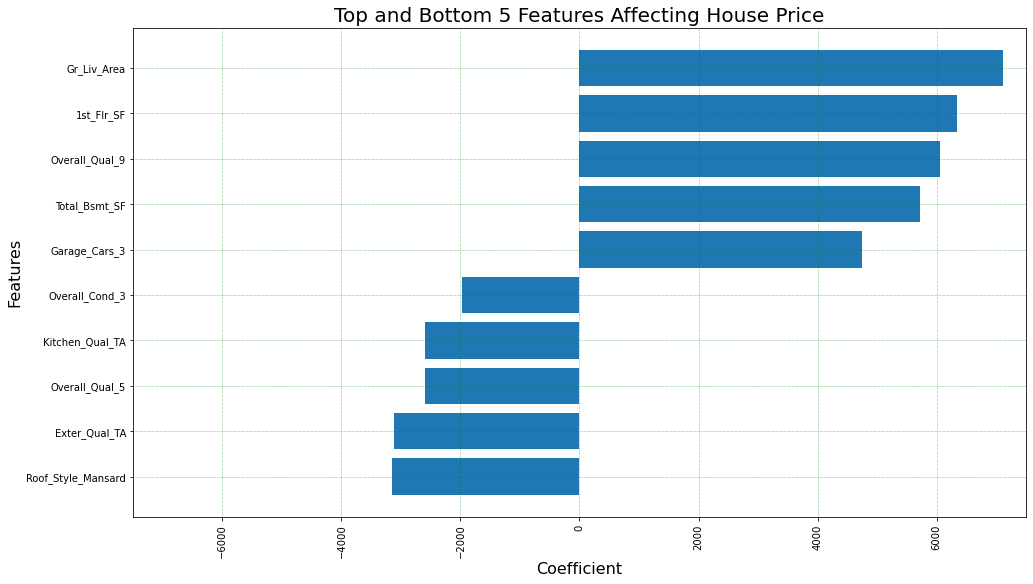

In [123]:
# To save a new dataframe by sorting according to coefficient
coef_dict_sorted = coef_dict_ori.sort_values(by = 'coeff', ascending = False)

# Create new df
plt.figure(figsize = (16, 9))
new_df = pd.concat([coef_dict_sorted[:5], coef_dict_sorted[-5:]])
new_df.sort_values(by = ['coeff'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.barh(new_df['feature'], new_df['coeff']) 
plt.xticks(rotation=90) 

plt.title('Top and Bottom 5 Features Affecting House Price', fontsize = 20)
plt.xlabel('Coefficient', fontsize = 16)
plt.ylabel('Features', fontsize = 16)
plt.xlim(-7500,7500)
plt.grid(color='g', linestyle=':', linewidth=0.5, visible = bool )

plt.savefig('./image/top_btm_5.jpg')

In [124]:
new_df.sort_values(by =['coeff'], ascending = False)

,feature,coeff,actual_coeff
9,Gr_Liv_Area,7114.307,15.083096
8,1st_Flr_SF,6335.794,16.801896
7,Overall_Qual_9,6057.158,31254.002804
6,Total_Bsmt_SF,5726.140,13.679988
5,Garage_Cars_3,4745.034,15218.667734
4,Overall_Cond_3,-1980.399,-14306.460524
3,Kitchen_Qual_TA,-2591.771,-5188.940262
2,Overall_Qual_5,-2592.754,-5860.052450
1,Exter_Qual_TA,-3118.065,-6436.476065
0,Roof_Style_Mansard,-3147.429,-55237.447814


# Conclusions & Recommendations

## Conclusions
From the chart above, we would suggest a new home buyer to consider the following when purchasing the house:
Permament Feature:
- Large Ground Living Area
- Large 1st Floor Area
- Large Total Basement Area
- Garage Capacity of 3 vehicles

Non-Permanent Feature:
- Overall Quality rated Average or Fair


As Overall Quality rated Excellent is one of the Top 5 categories, hence it is advisable to home buyer to plan for renovating the house and improve the overall quality to higher rate. This will improve the overall sale prices which in return could provide better investment options.

Based on our analysis, below are the breakdown of the price impact on the top 5 selected features.
|Features|Price Impact (USD)|Unit|
|---|---|---|
|Ground Living Area|15.08|per sqft|
|1st Floor Area|16.80|per sqft|
|Overall Quality rated Excelent|31,254.00|per unit|
|Total Basement Area|13.68|per sqft|
|Garage Capacity of 3 Cars|15,218.67|per unit|

By selecting the features above, the prices are predicted to be increased basing on the price impact. 

As for features to avoid, below are the 5 features that one should avoid:
|Features|Price Impact (USD)|Unit|
|---|---|---|
|Roof Style Mansard|- 55,237.45|per unit|
|External Quality rated Average|- 6,436.48|per unit|
|Overall Quality rated Average|- 5,860.05|per unit|
|Kitchen Quality rated Average|- 5,188.94|per unit|
|Overall Condition rated Fair|- 14,306.46|per unit|

## Recommendations
This model could definitely be improved in terms of predicting the price of the housing in Ames. Below are some recommendations to further enhanced the model:
- Capturing the timeline and impact of global recessions where housing price & spending power tends to be lower
- To include the annual income of the buyer and sellers where this could largely affect the price of the transaction
- To include the duration taken for the house to be in the market until sold where this could show the popularity of the housing areas

# Predict the test set given for Kaggle

In [125]:
test_set_sc = sc.transform(test_set_dumm) 

In [126]:
predict_y = enet.predict(test_set_sc)

In [127]:
test_set = pd.read_csv('./datasets/test.csv')
test_set_sc = pd.DataFrame(test_set['Id'])

In [128]:
test_set_sc['SalePrice'] = predict_y

In [129]:
test_set_sc

,Id,SalePrice
0,2658,104238.783943
1,2718,178449.315744
2,2414,213734.637905
3,1989,104906.204412
4,625,189692.366186
...,...,...
873,1662,202219.183364
874,1234,221408.472362
875,1373,130826.725816
876,1672,112178.346751


In [130]:
predict = test_set_sc.sort_values('Id')

In [131]:
predict.to_csv('./datasets/predict.csv', index=False)

In [131]:
predict.to_csv('./datasets/predict.csv', index=False)